In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [15]:
dataframe = pd.read_csv("/content/dataframe.csv")

In [16]:
dataframe.shape

(119210, 27)

In [17]:
#show all the columns
pd.set_option('display.max_columns',27)

In [18]:
dataframe.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0,7,27,1,0,1,1,0.0,0,0,0,0,0,75.0,0,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0,13,27,1,0,1,1,0.0,0,0,0,0,0,75.0,0,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0,14,27,1,0,2,2,0.0,0,0,0,0,0,98.0,0,1


###**Outlier handling**

####**Ploting distribution of all Independent variables**

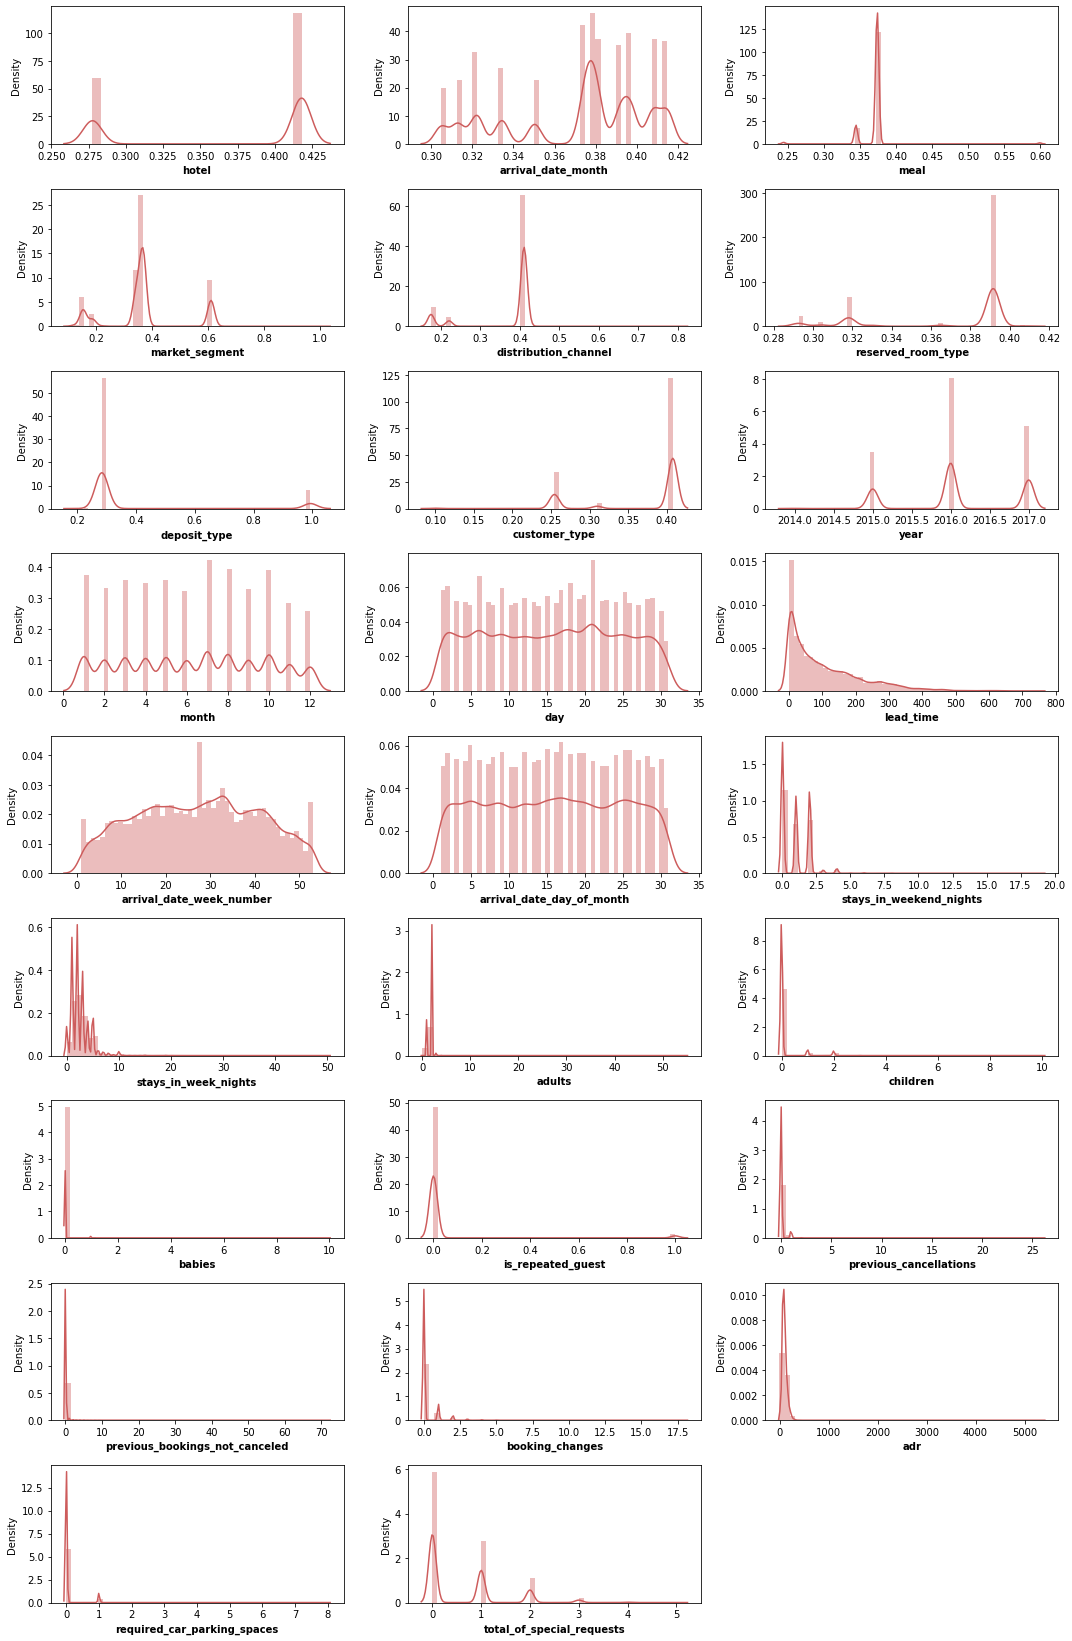

In [19]:
independent_features = dataframe.drop('is_canceled', axis=1)

plt.figure(figsize=(15, 25))
for i, col in enumerate(independent_features):
    plt.subplot(10, 3, i+1)
    sns.distplot(x=independent_features[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

**Insights**
*  As per the above plot most of the features are not normally distributed.
*  Features like `lead_time` and `adr` needs transformation.



In [20]:
def handel_outlier(col):
  dataframe[col] = np.log1p(dataframe[col])

In [21]:
handel_outlier('lead_time')

<Axes: xlabel='lead_time', ylabel='Density'>

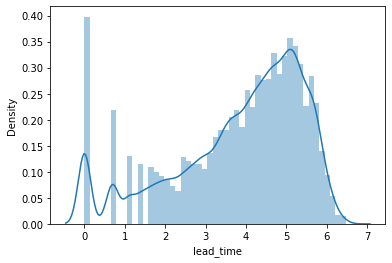

In [22]:
sns.distplot(dataframe['lead_time'])

In [23]:
###adr
handel_outlier('adr')

<Axes: xlabel='adr', ylabel='Density'>

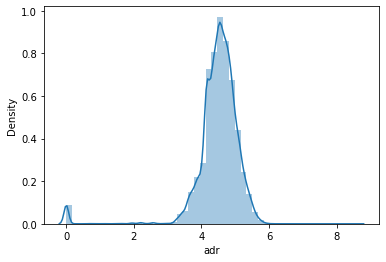

In [26]:
sns.distplot(dataframe['adr'])

###**Feature Importance**

In [27]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
year                              0
month                             0
day                               0
is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [28]:
dataframe.dropna(inplace=True)

In [30]:
## Independent and Dependent features

x = dataframe.drop('is_canceled', axis=1)
y = dataframe['is_canceled']

In [31]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel 

In [32]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))

In [33]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [35]:
#name of important features

col = x.columns
selected_feat = col[feature_sel_model.get_support()]

In [38]:
#final Independent features
x = x[selected_feat]

In [39]:
x.shape

(119209, 14)

###**Model Training**

In [40]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.5 MB/s eta 0:00:00


In [47]:
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [45]:
#train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

####**Create an Evaluate Function to give all metrics after Training**

In [46]:
def evaluate_model(true,predicted):

  '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
  '''
  acc = accuracy_score(true, predicted) # Calculate Accuracy
  f1 = f1_score(true, predicted) # Calculate F1-score
  precision = precision_score(true, predicted) # Calculate Precision
  recall = recall_score(true, predicted)  # Calculate Recall
  roc_auc = roc_auc_score(true, predicted) #Calculate Roc
  return acc, f1 , precision, recall, roc_auc

In [49]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Neighbors Classifier': KNeighborsClassifier(),
    'XGB Classifier': XGBClassifier(),
    'CatBoost Classifier': CatBoostClassifier(verbose=False),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB()
}


model_list = []
acc = []
f1 = []
precision = []
recall = []
roc_auc = []

for i in range(len(list(models))):
  model = list(models.values())[i]
  #training
  model.fit(X_train, y_train) 

  #prediction
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  #Evaluation
  model_train_acc, model_train_f1, model_train_precision, model_train_recall, model_train_roc_auc = evaluate_model(y_train, y_train_pred)

  model_test_acc, model_test_f1, model_test_precision, model_test_recall, model_test_roc_auc = evaluate_model(y_test, y_test_pred)


  print(list(models.values())[i])
  model_list.append(list(models.keys())[i])

  print("Model Performance on Training Set")
  print("- Accuracy : {:.4f}".format(model_train_acc))
  print("- f1 Score : {:.4f}".format(model_train_f1))
  print("- Precision : {:.4f}".format(model_train_precision))
  print("- Recall : {:.4f}".format(model_train_recall))
  print("- Roc_Auc : {:.4f}".format(model_train_roc_auc))

  print("-"*45)

  print("Model Performance on Test Set")
  print("- Accuracy : {:.4f}".format(model_test_acc))
  print("- f1 Score : {:.4f}".format(model_test_f1))
  print("- Precision : {:.4f}".format(model_test_precision))
  print("- Recall : {:.4f}".format(model_test_recall))
  print("- Roc_Auc : {:.4f}".format(model_test_roc_auc))

  acc.append(model_test_acc)
  f1.append(model_test_f1)
  precision.append(model_test_precision)
  recall.append(model_test_recall)
  roc_auc.append(model_test_roc_auc)

  print("="*45)
  print("\n")

LogisticRegression()
Model Performance on Training Set
- Accuracy : 0.7543
- f1 Score : 0.6433
- Precision : 0.6948
- Recall : 0.5989
- Roc_Auc : 0.7222
---------------------------------------------
Model Performance on Test Set
- Accuracy : 0.7537
- f1 Score : 0.6471
- Precision : 0.6968
- Recall : 0.6040
- Roc_Auc : 0.7235


RandomForestClassifier()
Model Performance on Training Set
- Accuracy : 0.9998
- f1 Score : 0.9998
- Precision : 0.9999
- Recall : 0.9997
- Roc_Auc : 0.9998
---------------------------------------------
Model Performance on Test Set
- Accuracy : 0.9564
- f1 Score : 0.9388
- Precision : 0.9871
- Recall : 0.8950
- Roc_Auc : 0.9440


DecisionTreeClassifier()
Model Performance on Training Set
- Accuracy : 0.9998
- f1 Score : 0.9998
- Precision : 0.9999
- Recall : 0.9996
- Roc_Auc : 0.9998
---------------------------------------------
Model Performance on Test Set
- Accuracy : 0.9484
- f1 Score : 0.9311
- Precision : 0.9287
- Recall : 0.9336
- Roc_Auc : 0.9454


Gradi

###**Result**

In [50]:
pd.DataFrame(list(zip(model_list, acc, f1, precision, recall, roc_auc)),
             columns=['Model Name','Accuracy','f1 Score','Precision','Recall','Roc_Auc']).sort_values(by=['Accuracy'], ascending=False)

,Model Name,Accuracy,f1 Score,Precision,Recall,Roc_Auc
5,XGB Classifier,0.974121,0.964308,0.995581,0.934941,0.966231
6,CatBoost Classifier,0.972150,0.961364,0.998791,0.926640,0.962985
1,Random Forest,0.956379,0.938816,0.987133,0.895008,0.944021
4,K-Neighbors Classifier,0.949753,0.928835,0.987246,0.876949,0.935091
2,Decision Tree,0.948368,0.931141,0.928699,0.933595,0.945393
3,Gradient Boosting,0.882057,0.814878,0.986295,0.694223,0.844231
7,AdaBoost Classifier,0.813355,0.697238,0.886045,0.574762,0.765307
0,Logistic Regression,0.753670,0.647119,0.696817,0.604038,0.723537
8,Naive Bayes,0.544208,0.608946,0.448289,0.949075,0.625740


###**XGB Classifier**

In [52]:
XGB_Classifier = XGBClassifier()
XGB_Classifier = XGB_Classifier.fit(X_train, y_train)
y_pred = XGB_Classifier.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 97.41


####**Confusion Metrix**

In [54]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14890    37]
 [  580  8335]]
